## Assignment on Advanced Machine Learning 
### Name: Okaba Mark Ndowobe (191144119)

In [1078]:
# import necessary modules and libraries
import numpy as np 
import pandas as pd
from numpy import exp, array, random, dot, log
from itertools import combinations_with_replacement
import seaborn as sn 
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Homework-1: Design an artificial neural network model that learns the product of two digits (Digits: 0, 1, 2, 3, 4, 5, 6, 7, 8,9)? For example, if inputs 3 and 2 should find the result as 5.99 with an error of 0.01. You can create the necessary training set for two digits yourself.

 * Generate dataset 

In [1079]:
# A Python program to print all combinations 
# with an element-to-itself combination is  
# also included 

X = []
# Get all combinations of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] and length 2 
comb = combinations_with_replacement([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2) 
  
# Print the obtained combinations 
for i in list(comb):
    datum = list(i)
    X.append(datum)

X = (array(X))
digdf = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': X[:, 0]*X[:, 1]})
digdf = digdf[np.isfinite(digdf['label'])]
digdf.head(10)  # Check first 10features and labels

x  y  label
0  0  0      0
1  0  1      0
2  0  2      0
3  0  3      0
4  0  4      0
5  0  5      0
6  0  6      0
7  0  7      0
8  0  8      0
9  0  9      0

* Extract features and labels 

In [1080]:
digFeatures = digdf.values[:, 0:2] # Get first two columns of dataframe, features
digLabels = digdf.values[:, 2] # Get 3rd column of data since it is zero base, class

* Split data into testing and training set

In [1081]:
X_train, X_test, y_train, y_test = train_test_split(digFeatures, digLabels,
                                                    random_state=0, shuffle=True, test_size=0.1) # Use train test split to split data into train and test set

### Initialize, fit and predict using MLPRegressor

MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.
It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.
This implementation works with data represented as dense and sparse numpy arrays of floating point values.

In [1082]:
regr = MLPRegressor(random_state=0, activation='relu', solver='adam', hidden_layer_sizes=(70,), max_iter=30000).fit(X_train, y_train) # Initialize MLPRegressor and fit data
y_pred = regr.predict(X_test) # Predict the test set and store result in a variable, y_pred

* Check performance of the regressor

In [1083]:
score = regr.score(X_test, y_test) # See how the model performed in terms of accuracy
print(score)

0.9987418377975439


* Compare predicted values to actual values

In [1084]:
performance = pd.DataFrame({"predicted_value": y_pred[:5], "actual_value": y_test[:5]})
print(performance) # See results by values and compare with the original values

predicted_value  actual_value
0        36.559221            36
1        27.147650            27
2        25.074502            25
3        17.926345            18
4         1.729191             2


### Homework-2: Classify Irıs dataset by using decision tree, naive bayes classifier, and SVM methods. Please use classification metrics such as accuracy, F1 score, precision, recall etc.?

* Load data from csv

In [1085]:
iris = pd.read_csv('iris_csv.csv')

iris.head()


sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [1086]:
iris.tail()

sepallength  sepalwidth  petallength  petalwidth           class
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

* Convert labels to numbers

In [1087]:
d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris['class'] = iris['class'].map(d)

iris.head()

sepallength  sepalwidth  petallength  petalwidth  class
0          5.1         3.5          1.4         0.2      0
1          4.9         3.0          1.4         0.2      0
2          4.7         3.2          1.3         0.2      0
3          4.6         3.1          1.5         0.2      0
4          5.0         3.6          1.4         0.2      0

* Check  distribution of data

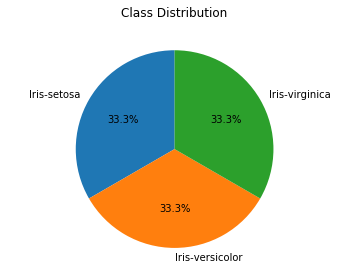

In [1088]:
class_dist = iris.groupby('class').size()
labels = 'Iris-setosa','Iris-versicolor', 'Iris-virginica'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

* Visualize the iris data  

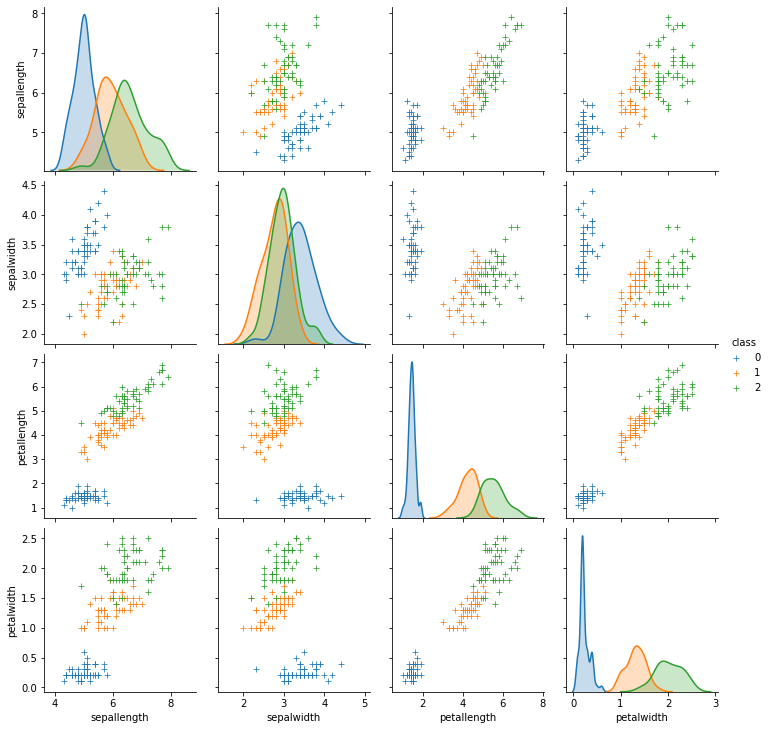

In [1107]:
irisVisuals = sn.pairplot(iris, hue='class', markers='+')
plt.show()

* Extract features and labels

In [1089]:
irisFeatures = iris.values[:, 0:4]
irisLabels = iris.values[:, 4]

* Split data for training and testing

In [1090]:
X_train, X_test, y_train, y_test = train_test_split(irisFeatures, irisLabels, test_size=0.25, random_state=42, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Perform classification using Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.


[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


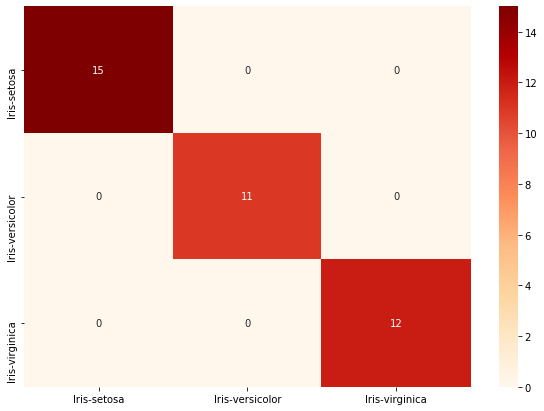

In [1091]:
dtClf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
y_pred = dtClf.fit(X_train, y_train).predict(X_test)

# Visualize confusion matrix as a heat map
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (dtClf.score(X_test, y_test)*100))

### Perform Naive Bayes classification

In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


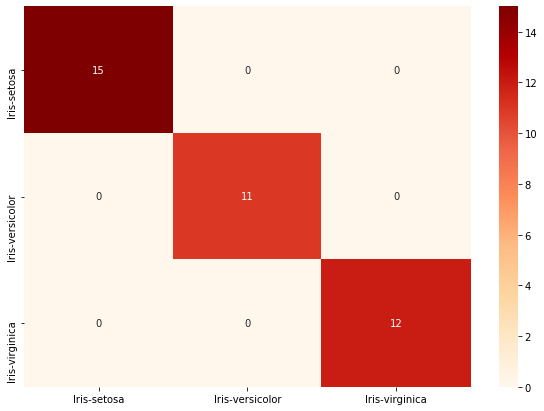

In [1092]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Visualize confusion matrix as a heat map
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (gnb.score(X_test, y_test)*100))

### Perform SVM Classification 

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Test accuracy: 100.00%


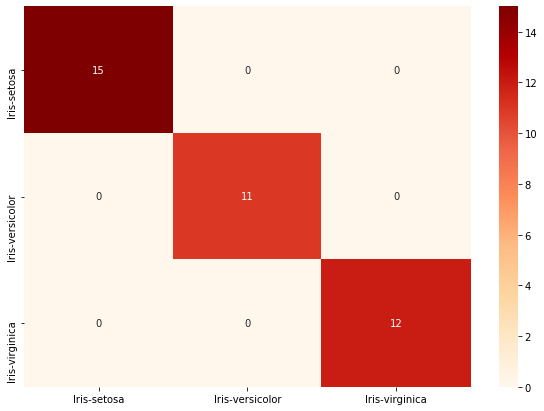

In [1093]:
clfSVM = svm.SVC()
y_pred = clfSVM.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Visualize confusion matrix as a heat map
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']],
              columns = [i for i in ['Iris-setosa','Iris-versicolor', 'Iris-virginica']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (clfSVM.score(X_test, y_test)*100))

### Homework-3: Implement a Linear Discriminant analysis to classify diabets dataset. The dataset can be downloaded from  https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/hw03/dataset_37_diabetes.csv  .

* Read diabetes data from CSV

In [1094]:
diabetesdf = pd.read_csv('dataset_37_diabetes.csv')

diabetesdf.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

* Convert labels to binary

In [1095]:
d = {'tested_negative': 0, 'tested_positive': 1, }

diabetesdf['class'] = diabetesdf['class'].map(d)

diabetesdf.head()

preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

* Check  distribution of data

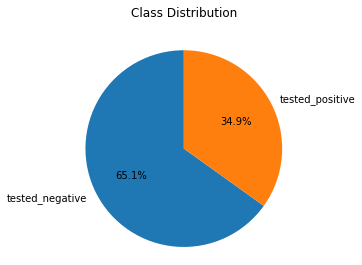

In [1096]:
class_dist = diabetesdf.groupby('class').size()
labels = 'tested_negative', 'tested_positive'
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()

* Visualize the diabetes dataset

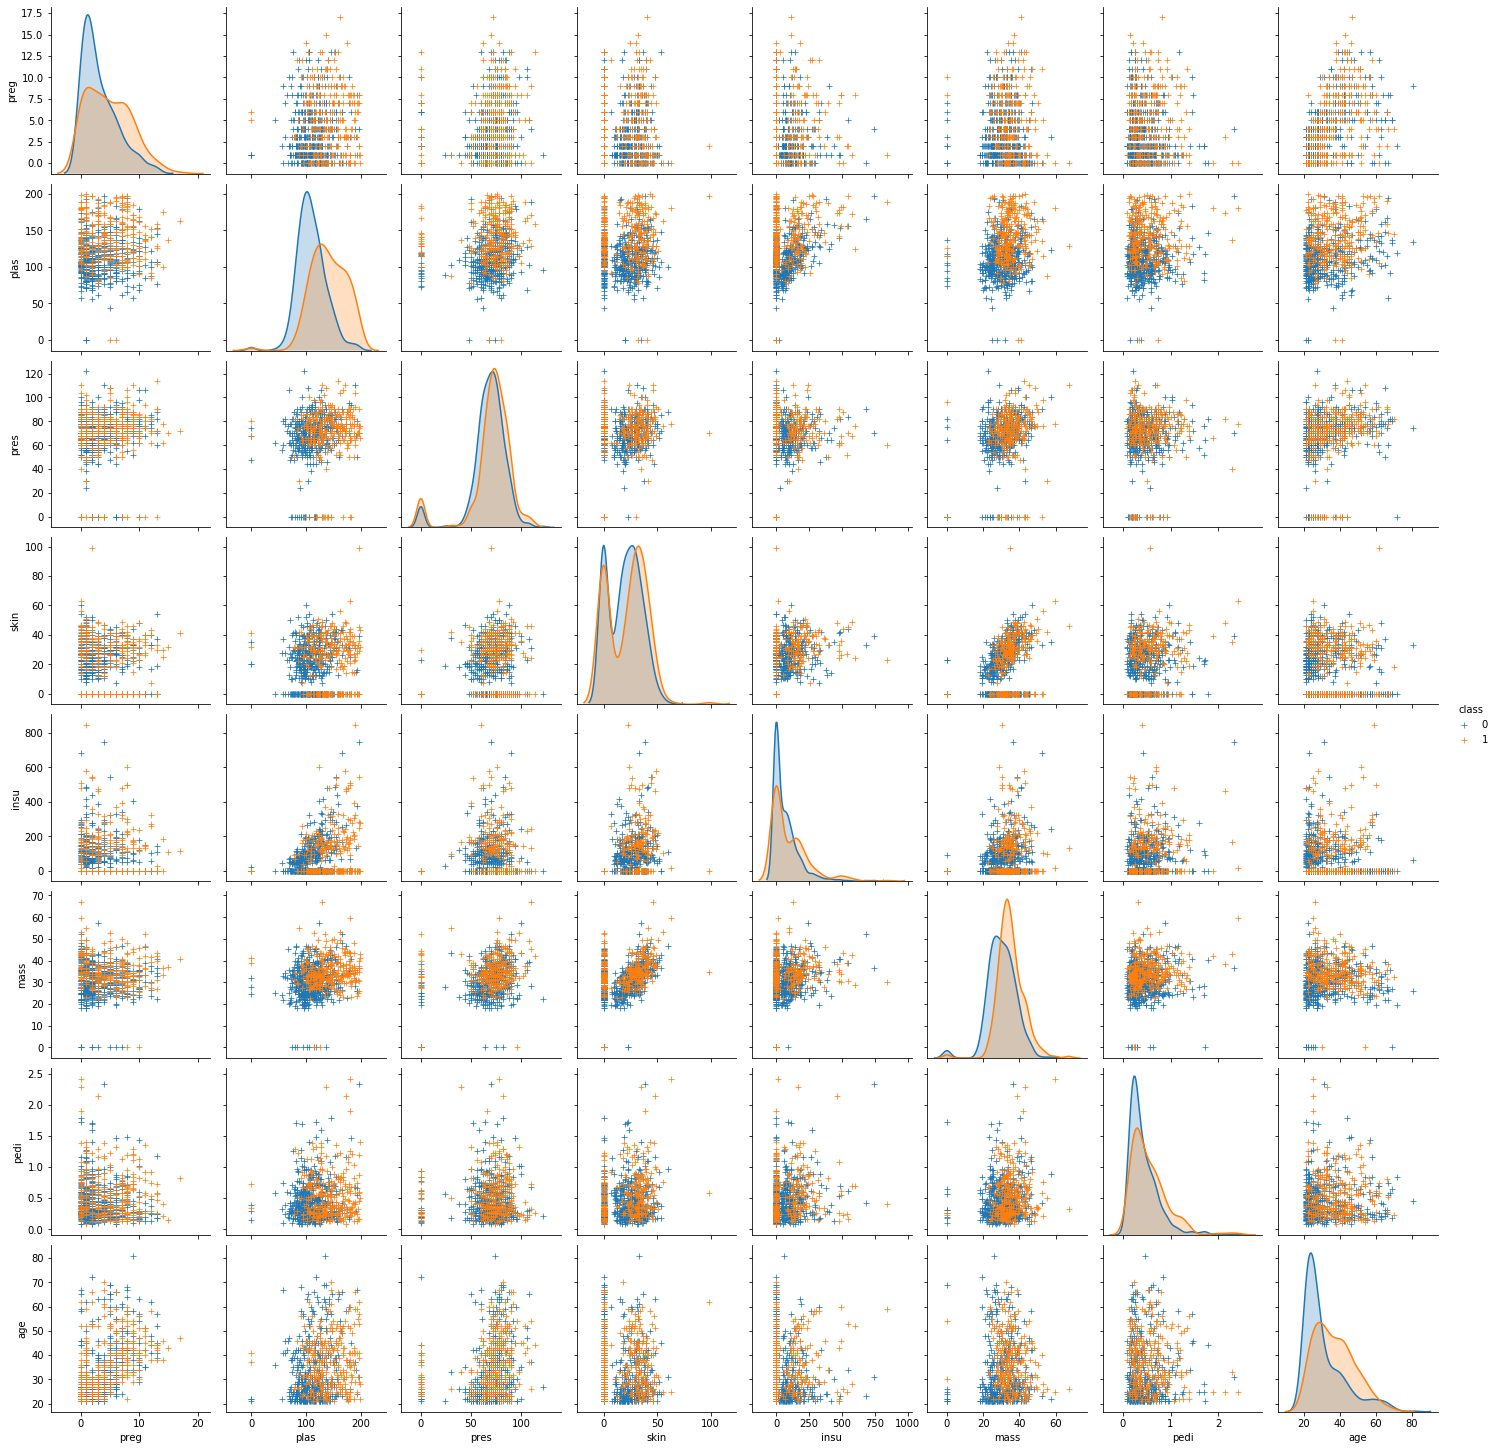

In [1108]:
g = sn.pairplot(diabetesdf, hue='class', markers='+')
plt.show()

* Check correlation of data

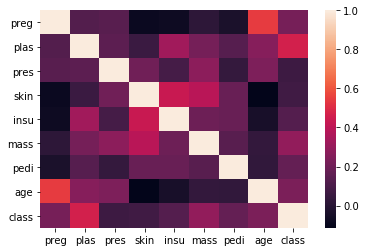

In [1097]:
corr=diabetesdf.corr()
sn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

* Extract features and labels

In [1098]:
# Get data and labels from the df
diabetesFeatures = diabetesdf.values[:, 0:8]
diabetesLabels = diabetesdf.values[:, 8]

* Replace 0s with mean

In [1099]:
from sklearn.impute import SimpleImputer

rep_0 = SimpleImputer(missing_values=0, strategy="mean")

diabetesFeatures = rep_0.fit_transform(diabetesFeatures)

* Split data for training and testing

In [1100]:
X_train, X_test, y_train, y_test = train_test_split(diabetesFeatures, diabetesLabels, test_size=0.2, random_state=0, shuffle=True)

* Apply LDA for feature scaling

In [1101]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Perform classification using Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

[[99  8]
 [20 27]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       107
         1.0       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Test accuracy: 81.82%


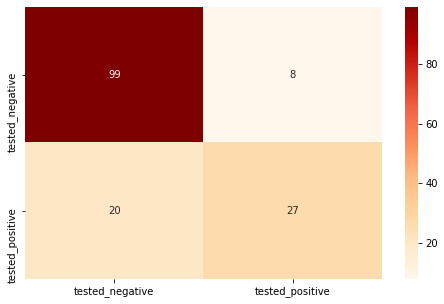

In [1102]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Visualize confusion matrix as a heat map
plt.figure(figsize = (8,5))
label = ["tested_negative","tested_positive"]
sn.heatmap(cnf_matrix, annot=True, xticklabels=label, yticklabels=label, cmap="OrRd")
print(classification_report(y_test, y_pred))
print('Test accuracy: %.2f%%' % (classifier.score(X_test, y_test)*100))

* Plot ROC Curve for the Random Forrest Classifier

Random Forest: ROC AUC=0.867


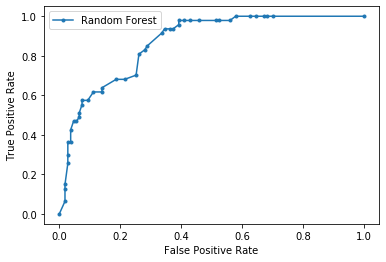

In [1103]:
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()